### Predictive Model with Gaussian Naive Bayes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

from scipy.io import loadmat 

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)

In [2]:
xx=loadmat('./wk_60_new.mat')

In [3]:
df=xx['wk_60']
df2=xx['wk_60']

In [4]:
X=df[:,:8]
y=df2[:,-1]

In [5]:
#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the  data (center around 0 and scale to remove the variance).
#scaler =StandardScaler()
#Xs = scaler.fit_transform(X)

In [6]:
#Xs

In [7]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot

>1 mean=0.5878 se=0.007 std=0.021
>1 mean=0.5288 se=0.015 std=0.045
>1 mean=0.3898 se=0.012 std=0.035
>1 mean=0.3268 se=0.009 std=0.027
>2 mean=0.5870 se=0.004 std=0.019
>2 mean=0.5293 se=0.010 std=0.044
>2 mean=0.3883 se=0.009 std=0.039
>2 mean=0.3257 se=0.008 std=0.034
>3 mean=0.5868 se=0.005 std=0.025
>3 mean=0.5293 se=0.007 std=0.039
>3 mean=0.3884 se=0.006 std=0.035
>3 mean=0.3258 se=0.006 std=0.032
>4 mean=0.5869 se=0.004 std=0.024
>4 mean=0.5293 se=0.006 std=0.038
>4 mean=0.3885 se=0.005 std=0.033
>4 mean=0.3260 se=0.005 std=0.030
>5 mean=0.5870 se=0.003 std=0.022
>5 mean=0.5294 se=0.005 std=0.035
>5 mean=0.3886 se=0.004 std=0.030
>5 mean=0.3260 se=0.004 std=0.028


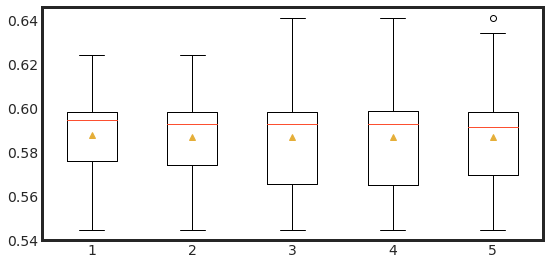

In [8]:
# evaluate a model with a given number of repeats
clf = clf = make_pipeline(StandardScaler(), GaussianNB())
def evaluate_model_acc(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
def evaluate_model_apr(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(clf, X, y, scoring='average_precision', cv=cv, n_jobs=-1)
    return scores

def evaluate_model_f1(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(clf, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return scores

def evaluate_model_recall(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(clf, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores

# configurations to test
repeats = range(1,6)
results_acc = list()
results_apr = list()
results_f1 = list()
results_recall = list()

for r in repeats:
    # evaluate using a given number of repeats
    scores_acc = evaluate_model_acc(X, y, r)
    scores_apr = evaluate_model_apr(X, y, r)
    scores_f1 = evaluate_model_f1(X, y, r)
    scores_recall = evaluate_model_recall(X, y, r)
    # summarize
    print('>%d mean=%.4f se=%.3f std=%.3f' % (r, mean(scores_acc), sem(scores_acc), std(scores_acc)))
    print('>%d mean=%.4f se=%.3f std=%.3f' % (r, mean(scores_apr), sem(scores_apr), std(scores_apr)))
    print('>%d mean=%.4f se=%.3f std=%.3f' % (r, mean(scores_f1), sem(scores_f1), std(scores_f1)))
    print('>%d mean=%.4f se=%.3f std=%.3f' % (r, mean(scores_recall), sem(scores_recall),std(scores_recall)))
    # store
    results_acc.append(scores_acc)
    results_apr.append(scores_apr)
    results_f1.append(scores_f1)
    results_recall.append(scores_recall)
# plot the results
pyplot.boxplot(results_acc, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [ ]:
print('>mean=%.4f se=%.3f std=%.3f' % ( mean(scores_apr), sem(scores_apr), std(scores_apr)))

In [9]:
clf = clf = make_pipeline(StandardScaler(), GaussianNB())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[833, 205],
       [459, 243]])

In [10]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.64      0.80      0.72      1038
           1       0.54      0.35      0.42       702

    accuracy                           0.62      1740
   macro avg       0.59      0.57      0.57      1740
weighted avg       0.60      0.62      0.60      1740

